# Prédiction des actions du joueur de Tennis et la trajectoire de la balle

**Lire les donées**

In [2]:
# lecture des données

import numpy as np
from PIL import Image 
import glob
import cv2

# Label de la sortie
# 0 : cd
# 1 : rv
# 2 : sm
# 3 : sv

# 0 : rv
# 1 : rv_slice
# 2 : rv_vol
# 3 : rv_2_main
# 4 : cd_flat
# 5 : cd_OS
# 6 : cd_slice
# 7 : cd_vol
# 8 : sv_flat 
# 9 : sv_kick
# 10: sv_slice
# 11: sm

action_size = 12
data_size = 150
frame_size = 15
action_list = [0, 4, 8]
X = []
X_cnn = []
y = []
for k in action_list: # range(action_size): # chaque action
    for i in range(data_size): # chaque vidéo est une données
        D = []
        I = cv2.imread("F:/Tennis/pred_data/frame_0.jpg")
        I = cv2.resize(I, (16, 12))
        for image in glob.glob(f"F:/Tennis/pred_data/ac{k}/vid ({i})/*.jpg"): # for j in range(frame_size): # chaque frame est une variable, 16*12 * 15 = 2880
            # img = PIL.Image.open(f"F:/Tennis/pred_data/ac{k}/vid ({i})/frame_0{j}.jpg").convert("L")
            img = Image.open(image).convert("L")
            img = img.resize((16, 12))
            imgarr = np.array(img)
            img_row = imgarr.reshape(-1) # transformer en ligne
            D = np.append(D, img_row)
            img = cv2.imread(image) # (longueur, hauteur, channel)
            img = cv2.resize(img, (16, 12)) # (int(img.shape[0] / 40), int(img.shape[1] / 40)))
            I = np.hstack((I, img))
            # image = np.vstack((img1, img2)) # concaténation verticale des frames
            # image = np.hstack((img1, img2)) # concaténation horizontale des frames
        X.append(D)
        X_cnn.append(I)
        y.append(k/4)
X = np.array(X)
X_cnn = np.array(X_cnn)
y = np.array(y)

In [3]:
# visualisation des données

print(len(X))
print(X.shape, X[20].shape, X[21][2833])
print(type(X), type(X[0]), type(X[0][0]))
print(len(X_cnn))
print(X_cnn.shape, X_cnn[20].shape, X_cnn[21][6].shape)
print(type(X_cnn), type(X_cnn[0]), type(X_cnn[0][0]))
print(len(y))
print(y.shape, y[101])
print(type(y), type(y[101]))

450
(450, 2880) (2880,) 0.0
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
450
(450, 12, 256, 3) (12, 256, 3) (256, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
450
(450,) 0.0
<class 'numpy.ndarray'> <class 'numpy.float64'>


In [4]:
# préparation de l'ensemble de test

import numpy as np
import PIL
from PIL import Image 

test_size = 15
frame_size = 15
X_test = []
X_test_cnn = []
# [0 0 0 0 0 4 4 4 4 4 8 8 8 8 8]
for i in range(test_size): # chaque vidéo est une données
        T = []
        I = cv2.imread("F:/Tennis/pred_data/frame_0.jpg")
        I = cv2.resize(I, (16, 12))
        for image in glob.glob(f"F:/Tennis/pred_data/test/test{i}/*.jpg"): # for j in range(frame_size): # chaque frame est une variable, 16*12 * 15 = 2880
            # img = PIL.Image.open(f"F:/Tennis/prediction/test/test{i}/frame_{j}.jpg").convert("L")
            img = Image.open(image).convert("L")
            img = img.resize((16, 12))
            imgarr = np.array(img)
            img_row = imgarr.reshape(-1) # transformer en ligne
            T = np.append(T, img_row)
            img = cv2.imread(image) # (longueur, hauteur, channel)
            img = cv2.resize(img, (16, 12)) # (int(img.shape[0] / 40), int(img.shape[1] / 40)))
            I = np.hstack((I, img))
        X_test.append(T)
        X_test_cnn.append(I)
X_test = np.array(X_test)
X_test_cnn = np.array(X_test_cnn)
print(X_test.shape)
print(X_test_cnn.shape)

(15, 2880)
(15, 12, 256, 3)


In [5]:
# test de la compression des images

import cv2

img = cv2.imread('F:/Tennis/pred_data/frame_0.jpg')
print(img.shape)
#x, y = img.shape[0:2]
# cv2.imshow('OriginalPicture', img)
 
img_test1 = cv2.resize(img, (int(img.shape[0] / 40), int(img.shape[1] / 40)))
print(img_test1.shape)
# cv2.imshow('resize0', img_test1)

img = PIL.Image.open("F:/Tennis/pred_data/frame_0.jpg").convert("L") # L = R * 299/1000 + G * 587/1000 + B * 114/1000 # ("RGB")
img = img.resize((20, 20))
img = img.save("F:/Tennis/pred_data/frame_0_test.jpg")

(480, 640, 3)
(16, 12, 3)


**K-means**

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X, y)
print(kmeans.labels_)
kmeans.predict(X_test)
print(kmeans.cluster_centers_)

# plt.scatter(X, y, c=kmeans.labels_)
# plt.show()

[0 0 2 2 0 2 0 0 2 0 0 2 2 2 2 0 1 1 1 1 1 0 1 1 1 1 1 1 2 0 0 2 0 0 2 0 0
 2 0 0 2 0 1 1 1 1 1 1 2 2 0 1 0 1 1 0 0 1 0 0 2 2 2 2 2 2 1 0 1 1 0 0 1 1
 1 2 0 2 1 1 0 2 2 2 0 2 2 0 0 2 0 0 2 2 0 2 2 2 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 2 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 2 2 2 2 2 1 1 1 2 0 0 2 0 1 1 1 2 0 2
 0 0 2 2 2 0 2 0 0 2 2 2 0 0 0 2 2 2 2 0 0 2 2 0 0 0 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1
 1 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 2 2 2 1 1 1 1 1 0 1 0 0
 1 1 0 2 0 0 2 2 2 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 1
 1 1 1 1 2 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0 1 0 0 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 0 0 0 0 0 0 0 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 2 2 1 1 1 2 1 1 1 1 1 2 0 0 0
 0 0 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0 1 1 0 2 0 0 1 1 1 2 2 2 0 0
 0 2 0 0 0 0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Réseaux de neurones**

In [35]:
# construction du model avec tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential(
    [               
        tf.keras.Input(shape = 2880), # 16*12 * 15 = 2880
        Dense(units=16, activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=64, activation="sigmoid"),
        Dense(units=128, activation="relu"),
        Dense(units=3, activation="softmax"),
    ]
)          
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                46096     
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 3)                 387       
                                                                 
Total params: 57,459
Trainable params: 57,459
Non-trainable params: 0
_________________________________________________________________


In [36]:
import tensorflow as tf

model.compile(
    #optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['acc']
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # 'Adam',
    metrics=['accuracy']
)

history = model.fit(
    X, y,
    epochs = 50,
    # batch_size = 32 # données transmises pour une session
)

prediction = model.predict(X_test) # np.expand_dims(X_test, axis = 1)
print (prediction)
# prediction_p = tf.nn.softmax(prediction)
# yhat = np.argmax(prediction)

# Softmax
# def softmax(z):  
#     ez = np.exp(z)
#     a = ez/np.sum(ez)
#     return a


Epoch 1/50
15/15 [==============================] - 1s 1ms/step - loss: 1.0784 - accuracy: 0.4111
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0120 - accuracy: 0.5222
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.9366 - accuracy: 0.5978
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.7839 - accuracy: 0.7111
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.7800
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7889
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8356
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8778
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2412 - accuracy: 0.9156
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2522 - accuracy: 0.9178
Epoch 11/50
15/15 [

**[0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8]**

**[0, 0, 0, 0, 0, 8, 4, 4, 4, 4, 8, 8, 8, 8, 8]**

**14/15**

**Réseau neuronal convolutionnel**

In [37]:
# construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model_cnn = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(12, 256, 3)), # kernel_size, strides, padding = 'same'
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Conv2D(128, (3, 3), activation='relu'),
        # BatchNormalization(),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.25),
        
        Flatten(),
        # Dense(512, activation='relu'),
        # BatchNormalization(),
        # Dropout(0.5),
        Dense(3, activation='softmax')
    ]
)            
model_cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # loss pour one-hot coding
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 10, 254, 32)       896       
                                                                 
 batch_normalization_2 (Batc  (None, 10, 254, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 127, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 127, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 125, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 3, 125, 64)      

In [38]:
# entraînement du modèle

import tensorflow as tf

history_cnn = model_cnn.fit(
    X_cnn, tf.keras.utils.to_categorical(y, 3), # one-hot coding
    epochs = 50,
)

Epoch 1/50
15/15 [==============================] - 1s 41ms/step - loss: 3.3743 - accuracy: 0.4178
Epoch 2/50
15/15 [==============================] - 1s 41ms/step - loss: 0.8977 - accuracy: 0.6933
Epoch 3/50
15/15 [==============================] - 1s 45ms/step - loss: 1.0243 - accuracy: 0.7089
Epoch 4/50
15/15 [==============================] - 1s 43ms/step - loss: 0.6707 - accuracy: 0.8000
Epoch 5/50
15/15 [==============================] - 1s 60ms/step - loss: 0.7842 - accuracy: 0.7778
Epoch 6/50
15/15 [==============================] - 1s 52ms/step - loss: 0.6813 - accuracy: 0.7956
Epoch 7/50
15/15 [==============================] - 1s 52ms/step - loss: 0.4396 - accuracy: 0.8467
Epoch 8/50
15/15 [==============================] - 1s 44ms/step - loss: 0.5316 - accuracy: 0.8422
Epoch 9/50
15/15 [==============================] - 1s 43ms/step - loss: 0.2616 - accuracy: 0.9067
Epoch 10/50
15/15 [==============================] - 1s 44ms/step - loss: 0.2985 - accuracy: 0.8978
Epoch 11/

In [39]:
# prédiction sur l'ensemble de test

prediction_cnn = model_cnn.predict(X_test_cnn)
print(prediction_cnn)

1/1 [==============================] - 0s 78ms/step
[[9.9540764e-01 4.5912890e-03 1.0964561e-06]
 [9.9998593e-01 7.2106236e-06 6.9289295e-06]
 [1.0000000e+00 6.0676100e-12 3.3241135e-10]
 [9.9998415e-01 1.5652678e-05 2.5000315e-07]
 [9.9452001e-01 5.4755094e-03 4.5433044e-06]
 [2.0663997e-06 9.9918288e-01 8.1513642e-04]
 [4.0281989e-07 9.9987316e-01 1.2651084e-04]
 [4.0072026e-12 9.9999988e-01 8.1146844e-08]
 [1.1104915e-12 1.0000000e+00 8.8396185e-10]
 [4.9134600e-05 9.9995041e-01 5.1785440e-07]
 [2.8253316e-07 5.3883507e-09 9.9999976e-01]
 [3.4675471e-09 2.7323863e-10 1.0000000e+00]
 [2.8060419e-18 3.5386507e-09 1.0000000e+00]
 [1.8615372e-05 1.4177556e-09 9.9998140e-01]
 [7.6779096e-17 8.4423491e-06 9.9999154e-01]]


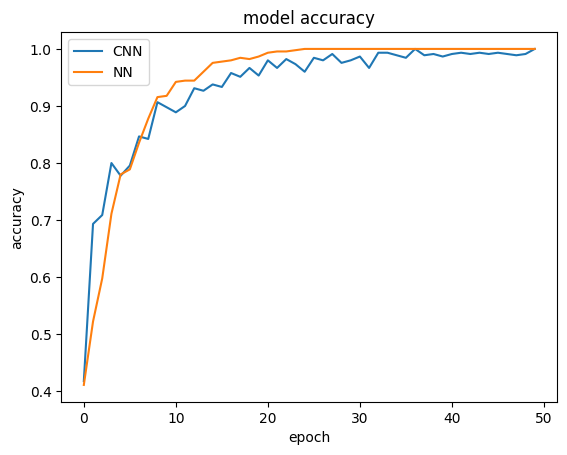

In [40]:
# visualisation 

from matplotlib import pyplot as plt

# "Accuracy"
plt.plot(history_cnn.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'NN'], loc='upper left')
plt.show()

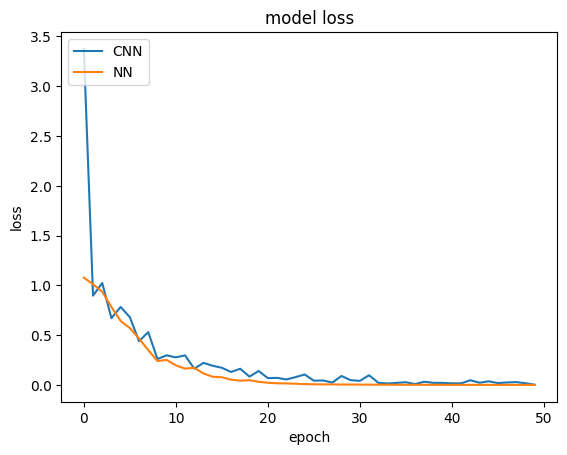

In [41]:
# "Loss"
plt.plot(history_cnn.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN', 'NN'], loc='upper left')
plt.show()

**[0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8]**

**[0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8]**

**15/15**

**N.B: squelette, position**

# ----------------------------------------------------------------

**Forêt aléatoire**

In [72]:
# lecture des données

import pandas as pd

df = pd.read_csv("F:/Tennis/prediction/new_pos.csv")
print(df.info)
df.head()

<bound method DataFrame.info of       col1_0  col1_1  col2_0  col2_1  col3_0  col3_1  col4_0  col4_1  col5_0   
0        175     232     184     227     195     229     200     215     196  \
1        176     232     191     229     188     233     200     216     205   
2        176     236     191     226     196     227     200     221     199   
3        176     238     184     236     191     224     189     214     194   
4        176     242     185     231     191     228     187     224     195   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6458     424     241     418     239     417     230     413     218     420   
6459     424     243     418     237     415     228     415     224     408   
6460     424     244     419     237     424     226     416     229     416   
6461     424     248     416     243     416     224     412     218     420   
6462     424     248     415     235     416     230     419     226     412   

      c

,col1_0,col1_1,col2_0,col2_1,col3_0,col3_1,col4_0,col4_1,col5_0,col5_1,...,col41_1,col42_0,col42_1,col43_0,col43_1,col44_0,col44_1,col45_0,col45_1,col46
0,175,232,184,227,195,229,200,215,196,213,...,119,374,114,371,110,380,108,391,93,2
1,176,232,191,229,188,233,200,216,205,217,...,121,377,110,374,107,383,97,382,101,2
2,176,236,191,226,196,227,200,221,199,221,...,113,375,106,377,110,378,97,383,95,2
3,176,238,184,236,191,224,189,214,194,215,...,120,368,105,380,108,384,96,386,94,2
4,176,242,185,231,191,228,187,224,195,219,...,113,374,105,373,109,380,98,392,102,2


In [73]:
# préparation de l'ensemble

from sklearn.model_selection import train_test_split

X = df.drop('col46', axis=1)
y = df['col46']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(type(X), X.shape)

<class 'pandas.core.frame.DataFrame'> (6463, 90)


In [74]:
# lecture des données

import pandas as pd

df_test = pd.read_csv("F:/Tennis/prediction/new_pos_test.csv")

# préparation de l'ensemble

X_test1 = df_test.drop('col46', axis=1)
y_test1 = df_test['col46']

print(type(X_test1), X_test1.shape)

<class 'pandas.core.frame.DataFrame'> (62, 90)


<Axes: xlabel='col46', ylabel='count'>

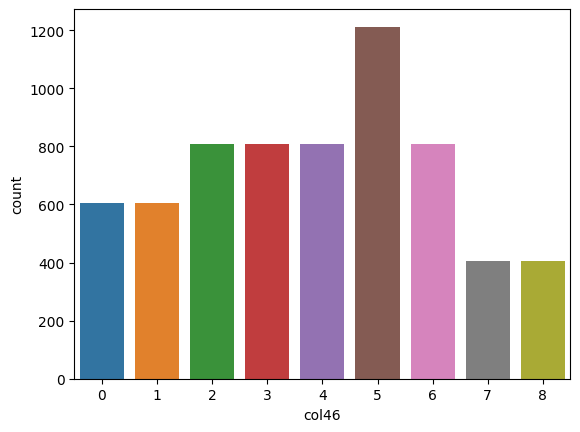

In [75]:
# visualisation

import seaborn as sns

sns.countplot(x='col46', data=df)

In [76]:
# entraînement et prédiction

from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_clf = RandomForestClassifier(n_estimators = 20, max_depth = 8)
# max_samples : indique le nombre d'échantillons à tirer des données d'entraînement dans l'échantillonnage Bootstrap. 
# max_depth : indique la profondeur maximale de l'arbre, que nous spécifions si nécessaire.
# n_estimators : indique le nombre d'arbres de décision à créer dans le modèle de forêt aléatoire. Par défaut, il est de 100.
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

# test de la précision

print(rf_clf.score(X_test1, y_test1))
print(rf_clf.score(X_train, y_train))

0.20967741935483872
1.0


**Réseau de neurones**

In [79]:
# construction du model avec tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model_b = Sequential(
    [               
        tf.keras.Input(shape = 90),
        Dense(units=16, activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=64, activation="sigmoid"),
        Dense(units=128, activation="relu"),
        Dense(units=9, activation="softmax"),
    ]
)          
model_b.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                1456      
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 13,593
Trainable params: 13,593
Non-trainable params: 0
_________________________________________________________________


In [80]:
import tensorflow as tf

model_b.compile(
    #optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['acc']
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # 'Adam',
    metrics=['accuracy']
)

history_b = model_b.fit(
    X_train, y_train,
    epochs = 50,
    # batch_size = 32 # données transmises pour une session
)

prediction1 = model_b.predict(X_test1) # np.expand_dims(X_test, axis = 1)
print (prediction1)
##############################################################################################################

Epoch 1/50
162/162 [==============================] - 1s 999us/step - loss: 2.0127 - accuracy: 0.2408
Epoch 2/50
162/162 [==============================] - 0s 932us/step - loss: 1.5108 - accuracy: 0.4364
Epoch 3/50
162/162 [==============================] - 0s 919us/step - loss: 1.2569 - accuracy: 0.5251
Epoch 4/50
162/162 [==============================] - 0s 917us/step - loss: 1.0389 - accuracy: 0.5985
Epoch 5/50
162/162 [==============================] - 0s 924us/step - loss: 0.8423 - accuracy: 0.6901
Epoch 6/50
162/162 [==============================] - 0s 955us/step - loss: 0.6810 - accuracy: 0.7586
Epoch 7/50
162/162 [==============================] - 0s 928us/step - loss: 0.5404 - accuracy: 0.8162
Epoch 8/50
162/162 [==============================] - 0s 936us/step - loss: 0.6232 - accuracy: 0.7857
Epoch 9/50
162/162 [==============================] - 0s 958us/step - loss: 0.3385 - accuracy: 0.9099
Epoch 10/50
162/162 [==============================] - 0s 934us/step - loss: 0.281

**Arbre de décision**

In [47]:
# entraînement du modèle

from sklearn import tree

ad_clf = tree.DecisionTreeClassifier(max_depth = 10)
ad_clf = ad_clf.fit(X_train, y_train)

In [48]:
# test de la performance

pred = ad_clf.predict(X_test)
print(ad_clf.score(X_test, y_test))

0.934261407579273


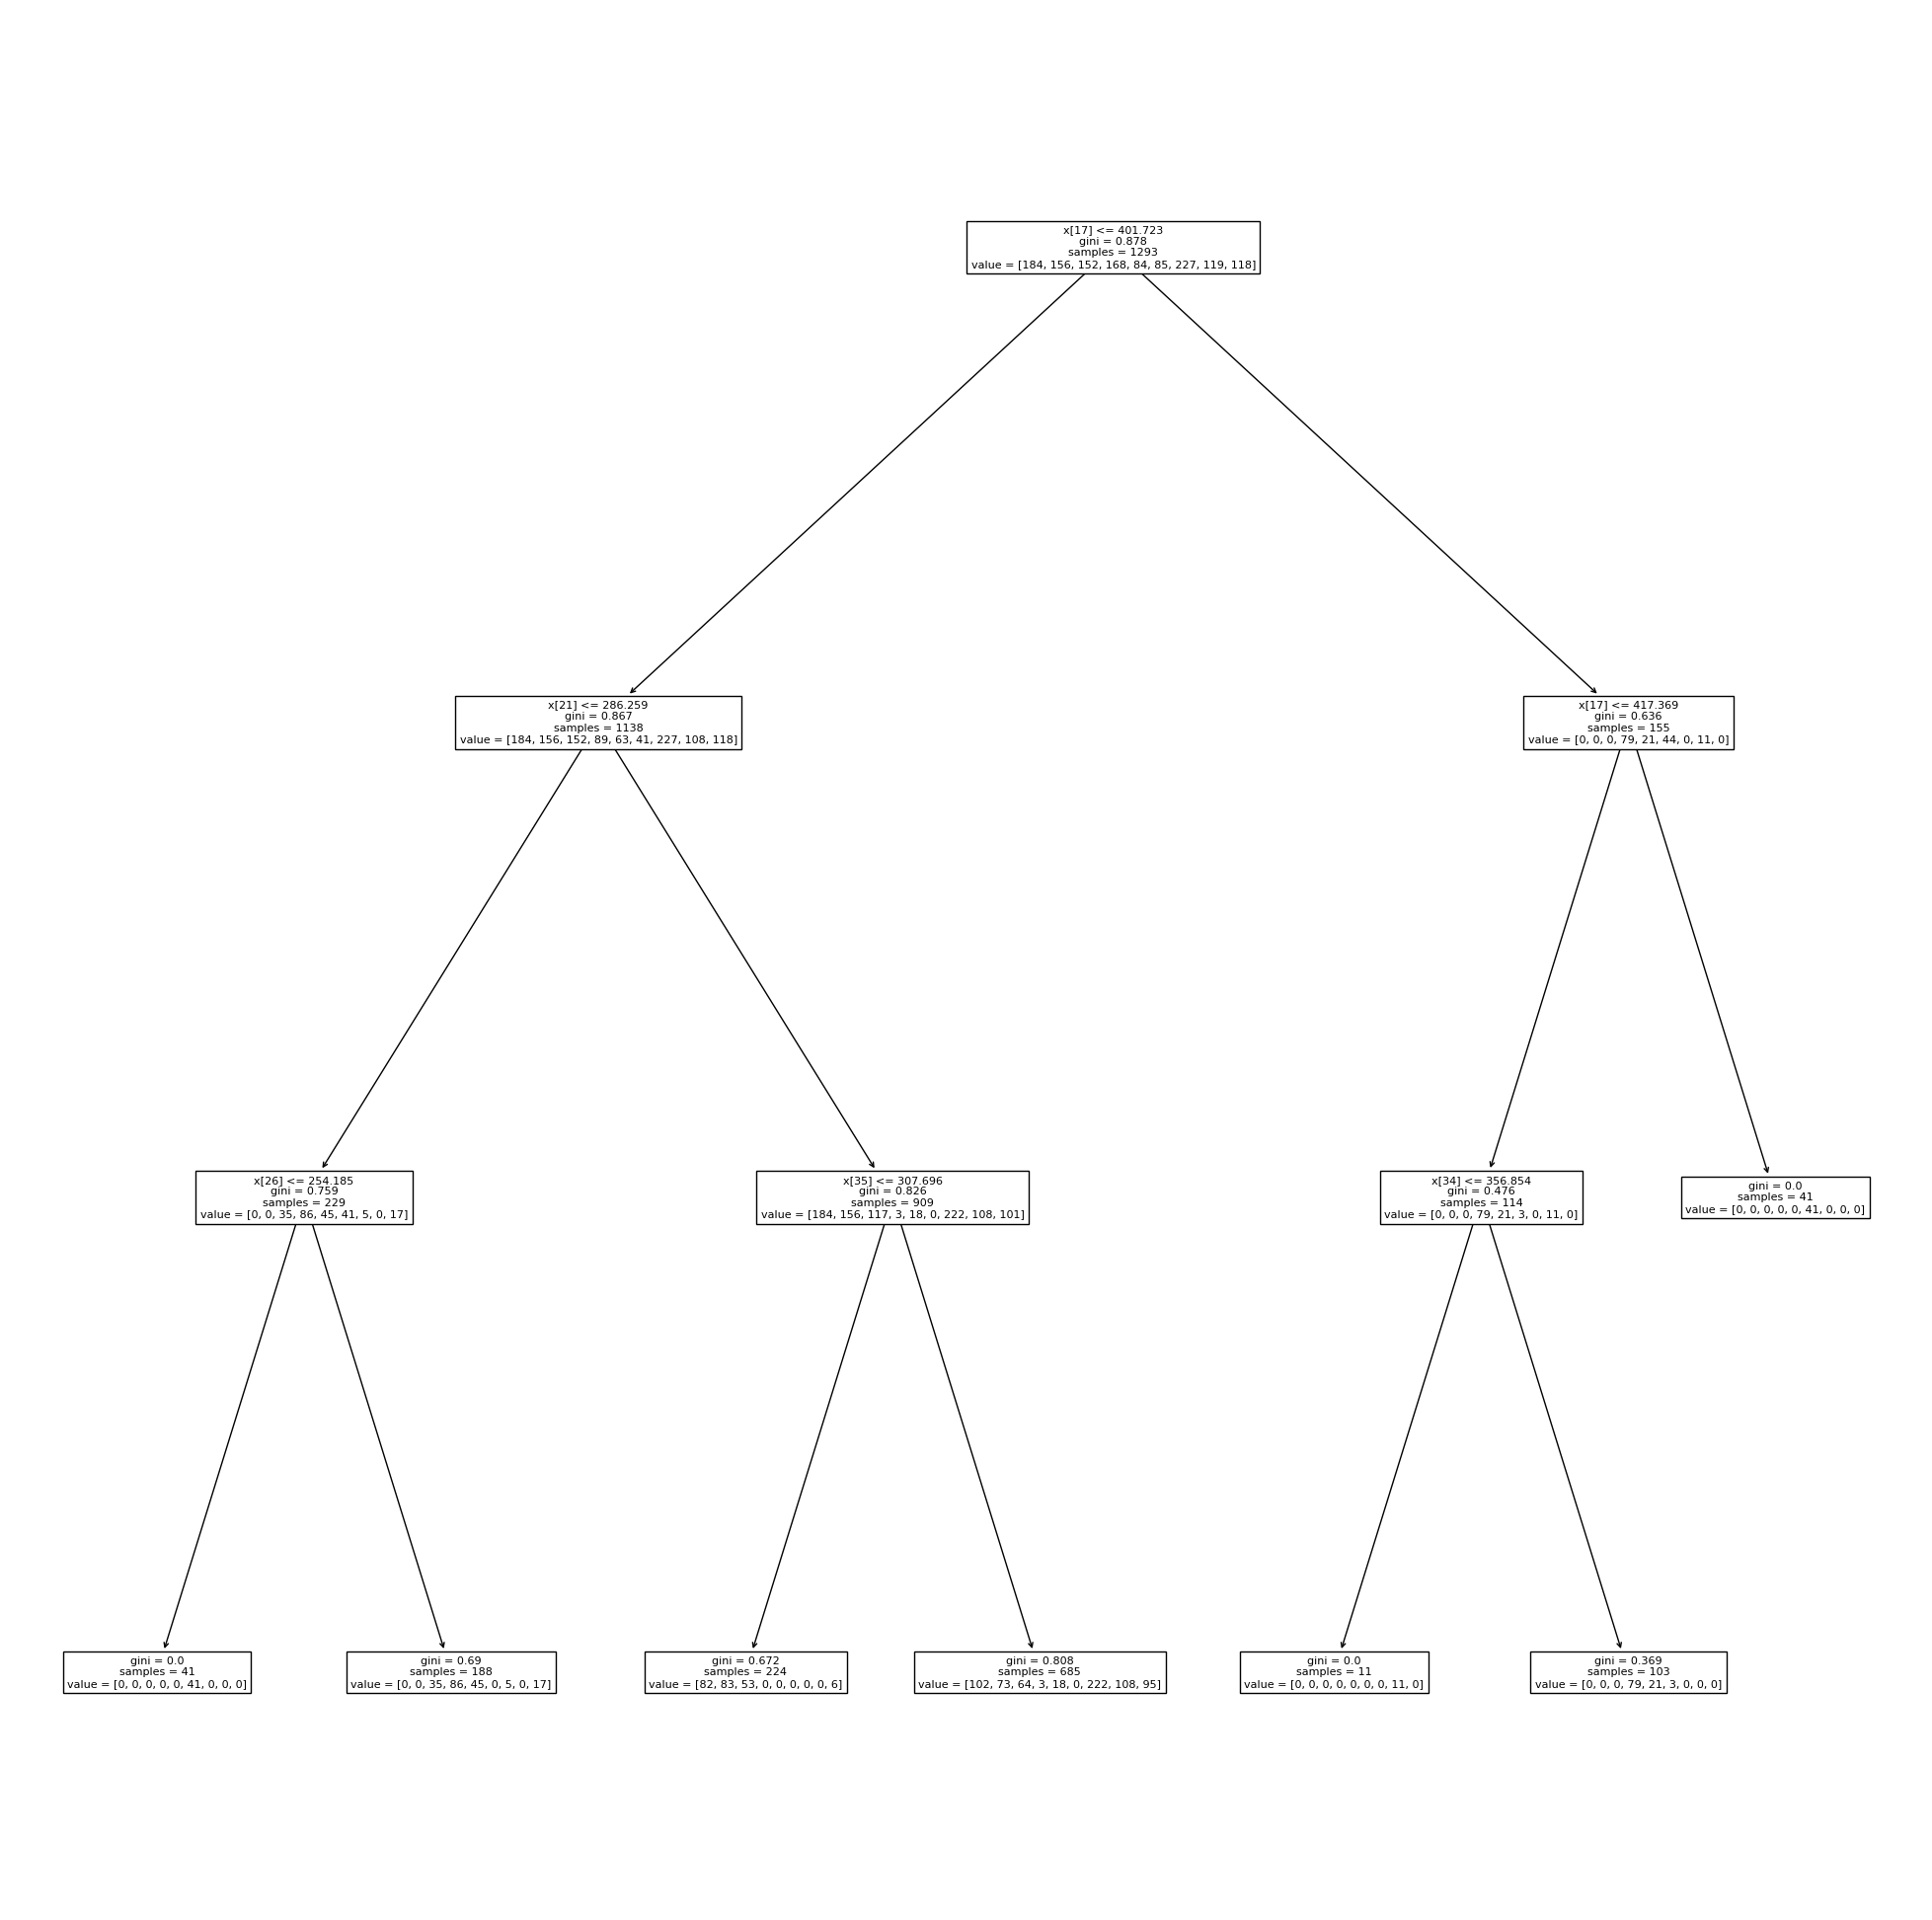

In [49]:
# visualisation de l'arbre

from sklearn import tree
import matplotlib.pyplot as plt

ad_clf_test = tree.DecisionTreeClassifier(max_depth=3)
ad_clf_test = ad_clf_test.fit(X_test, y_test)
plt.figure(figsize=(25,25))
tree.plot_tree(ad_clf_test);

# FIN